# Linear Models

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from numpy import ndarray
import pandas as pd
from time import sleep
np.random.seed(3)
plt.style.use('seaborn')
cmap = ListedColormap(sns.color_palette().as_hex())

## Linear function

Consider the function of a line.  
It's a function that maps the value of x to that of y, and in its simplest form is written as:

\begin{align}
    y=f(x,b)=mx+b
\end{align}

Where:
- *y* is the dependent variable
- *x* is the independent variable
- *m* is the slope
- *b* is the intercept

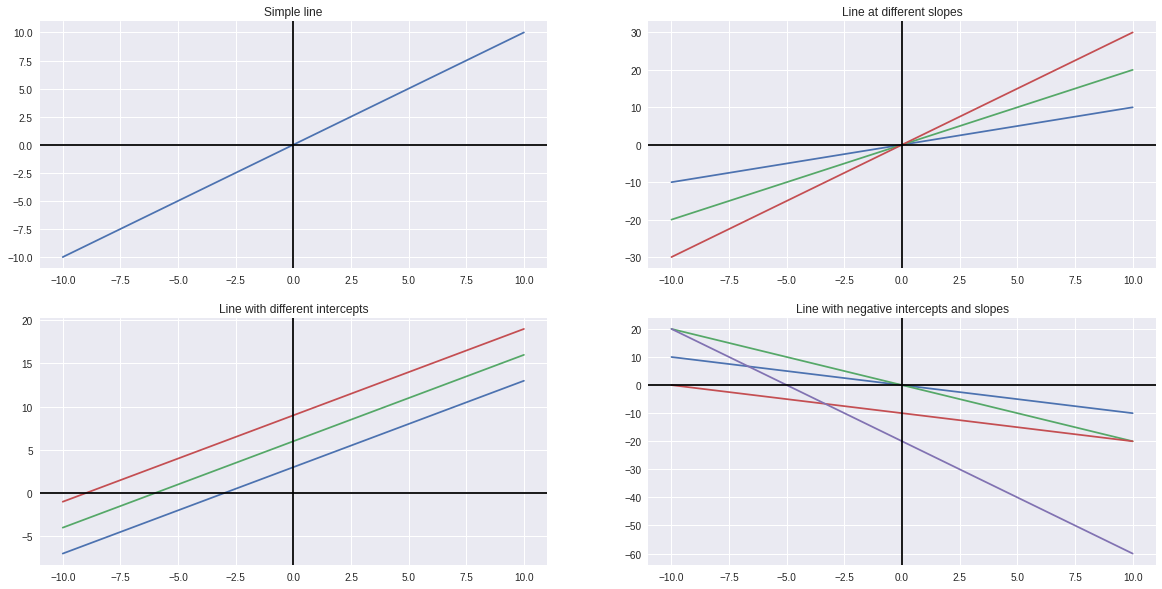

In [2]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
# for example, given a linear space
x = np.linspace(-10, 10, 40)
# the simplest line is given by:
y = 1*x + 0
# which maps all the points in the linear space X to those on the Y,
# producing the line:
axs[0,0].plot(x, y)
# tweaking the value of m changes the slope of the line:
axs[0,1].plot(x, x)
axs[0,1].plot(x, 2*x)
axs[0,1].plot(x, 3*x)
# tweaking the value of b changes the intercept of the line:
axs[1,0].plot(x, x+3)
axs[1,0].plot(x, x+6)
axs[1,0].plot(x, x+9)
# values can be negative too, giving rise to downward slopes and
# upward intercepts:
axs[1,1].plot(x, -x)
axs[1,1].plot(x, -2*x)
axs[1,1].plot(x, -x-10)
axs[1,1].plot(x, -4*x-20)
# now plotting
axs[0,0].set_title('Simple line')
axs[0,1].set_title('Line at different slopes')
axs[1,0].set_title('Line with different intercepts')
axs[1,1].set_title('Line with negative intercepts and slopes')
for ax in axs.flatten():
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
plt.show()

## Linear Regression

---

*A linear model is nothing more than a linear function (such as $f(x)=x$) that is fit to a set of data in the attempt to model the source of the data.*

---

### Theory


The linear regression can be classfied depending on the:
- degree of the function:  *binomial or polynomial*
- number of explanatory variables: *single or multiple*

Of the possible combinations aboove, the named ones are:
- simple regression: $f(x)=\theta_0+\theta_1x$  
    *(binomial function with one explanatory variable)*
- multiple regression: $f(x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$  
    *(binomial function with multiple explanatory variables)*

- polinomial regression: $f(x)=\theta_0+\theta_1x+\theta_2x^2_2+...+\theta_nx^n_n$  
    *(polinomial function (--> not linear!) with multiple explanatory variables*

Fitting the line to the data happens through error minimization. The error in this case is some elaboration of the delta between the y value on the line and the actual y value, mapped to the same x value.

Common ways to calculate the error are:
- sum of the residuals: $\sum {(\pmb y-f(\pmb X))}$
- sum of absolute value of residuals: $\sum {|\pmb y-f(\pmb X)|}$
- sum of square residuals: $\sum {(\pmb y-f(\pmb X))^2}$
- root of square residuals sum: $\sqrt {\sum (\pmb y-f(\pmb X))^2}$

### Math

Given the linear function:
\begin{align}
  \pmb{\hat y}=\pmb X\pmb\beta+\pmb\epsilon
\end{align}

Which remember, is in matrix notation, thus equivalent to:
\begin{align}
  \begin{pmatrix}
    y_1\\ y_2 \\ y_3 \\ \vdots \\ y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,m} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,m} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{n,1} & x_{n,2} & \cdots & x_{n, m}
  \end{pmatrix}
  \begin{pmatrix}
    \beta_1\\ \beta_2 \\ \beta_3 \\ \vdots \\ \beta_{m}
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

Given the mean square error:
\begin{align}
  mse=\frac{1}{n}\sum^n_{i=1}(\pmb y_i-\pmb{\hat y}_i)^2
\end{align}

Thus, we can write the loss function as a function of the slope and intercept, which are the paramters of the model to be tweaked in order to minimize the loss and improve the fit of the line on the data:
\begin{align}
  \mathcal L(\pmb \beta,\pmb \epsilon)=\frac{1}{n}\sum^n_{i=1}(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)^2
\end{align}

In order to minize the function is necessary to calculate the gradient, to find where it is more steep. The partial derivatives of mse loss are easily calculated:
\begin{align}
  \frac{\partial}{\partial {\pmb\beta}}L=-\frac{2}{n}\sum^n_{i=1}\pmb X_i(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)
\end{align}
\begin{align}
  \frac{\partial}{\partial {\pmb\epsilon}}L=-\frac{2}{n}\sum^n_{i=1}(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)
\end{align}

With the gradient of mse loss function being:
\begin{align}
  \nabla{\mathcal L}=
  \begin{pmatrix}
    \frac{\partial\mathcal L}{\partial\pmb\beta} \\
    \frac{\partial\mathcal L}{\partial\pmb\epsilon}
  \end{pmatrix}=
  \begin{pmatrix}
    \frac{2}{n}\sum^n_i\pmb X_i(\pmb{\hat y}_i-\pmb y_i) \\
    \frac{2}{n}\sum^n_i(\pmb{\hat y}_i-\pmb y_i)
  \end{pmatrix}
\end{align}

To improve the fitting of the line we need to minimize the loss, this is achieved through the *gradient descent algorhitm*, which essentially updates the slope and intercept paramters using the loss multiplied by a learning rate:
\begin{align}
  \Theta:=\Theta-\alpha\nabla\mathcal L
\end{align}

The update function which result is:
\begin{align}
  \pmb\beta:=\pmb\beta-\alpha\frac{\partial}{\partial\pmb\beta}
\end{align}
\begin{align}
  \pmb\epsilon:=\pmb\epsilon-\alpha\frac{\partial}{\partial\pmb\epsilon}
\end{align}

### Implementation

#### From scratch

Here's the goal:

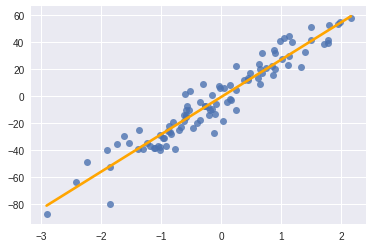

In [3]:
# generate fake data with a linear distribution
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10)
# plot the data and the linear regression line
sns.regplot(x=X, y=y, ci=None, line_kws={'color':'orange'})
plt.show()

Let's start dividing and plotting the data:

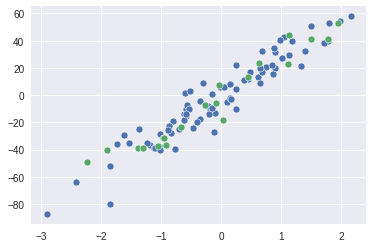

In [4]:
# spit the data in train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=3
)
sns.scatterplot(x=X_train.squeeze(), y=y_train, cmap=cmap)
sns.scatterplot(x=X_val.squeeze(), y=y_val, cmap=cmap)
plt.show()

Let's code the regressor:

In [5]:
class LinearRegressor:

    def __init__(self) -> None:
        self.beta = None
        self.epsilon = 0
    
    def predict(self,
                X: ndarray
                ) -> ndarray:
        yp = np.dot(X, self.beta) + self.epsilon
        return yp

    def _cycle(self,
               X: ndarray,
               y: ndarray,
               lr:int
               ) -> None:
        yp = self.predict(X)
        n = y.shape[0]
        delta = yp - y
        d_beta = 2 * np.sum(X.T * delta.reshape(1,-1)) / n
        d_epsilon = 2 * np.sum(delta) / n
        self.beta -= lr * d_beta
        self.epsilon -= lr * d_epsilon
    
    def fit(self,
            X: ndarray,
            y: ndarray,
            lr: int,
            epochs: int
            ) -> None:
        self.beta = np.zeros(X.shape[1])
        for epoch in range(epochs):
            self._cycle(X, y, lr)
    
    def mse(self,
            y: ndarray,
            yp: ndarray
            ) -> int:
        mse = np.mean(np.square(y-yp))
        return mse

    def fit_n_plot(self,
                   X: ndarray,
                   y: ndarray,
                   lr: int,
                   epochs: int,
                   sleep_time: int = 1
                   ) -> None:
        self.beta = np.zeros(X.shape[1])
        mse_list = []
        for epoch in range(epochs):
            self._cycle(X, y, lr)
            yp = self.predict(X)
            mse = self.mse(y, yp)
            mse_list.append(mse)
            fig, axs = plt.subplots(1, 2, figsize=(16,8))
            axs[1].title.set_text(f'MSE: {mse:.0f}')
            axs[0].title.set_text('Regression line')
            axs[1].set_ylim(ymin=0, ymax=np.max(mse_list))
            axs[1].set_xlim(xmin=0, xmax=epochs)
            linspace = np.linspace(0, epochs)
            axs[1].plot(mse_list, color=cmap.colors[2], linewidth=2)
            sns.scatterplot(x=X.squeeze(), y=y, s=50, cmap=cmap, ax=axs[0])
            sns.lineplot(x=X.squeeze(), y=yp,
                         color='orange', linewidth=3, ax=axs[0]
                         )
            clear_output()
            plt.show()
            sleep(sleep_time)
    
    def pred_n_info(self,
                    X: ndarray,
                    y: ndarray,
                    plot: bool = True
                    ) -> ndarray:
        yp = self.predict(X)
        mse = self.mse(yp, y)
        i = np.random.randint(0, len(y_val)-1)
        print(f'MSE:\t\t\t{mse:.2f}')
        print(f'Sample predicted y:\t{yp[i]:.0f}')
        print(f'Sample actual y:\t{y[i]:.0f}')
        if plot:
            plt.figure(figsize=(10,6))
            sns.scatterplot(x=X.squeeze(), y=y, s=100, cmap=cmap)
            sns.lineplot(x=X.squeeze(), y=yp, color='orange', linewidth=3)
        return yp

Let's see it in action (run the cell, it's animated):

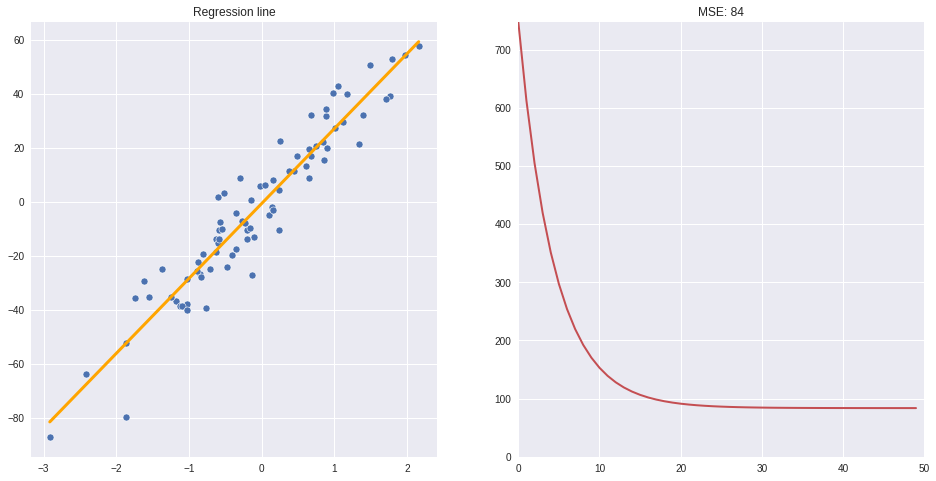

In [6]:
regressor = LinearRegressor()
regressor.fit_n_plot(X_train, y_train, lr=0.05, epochs=50, sleep_time=1)

MSE:			69.37
Sample predicted y:	-8
Sample actual y:	-7


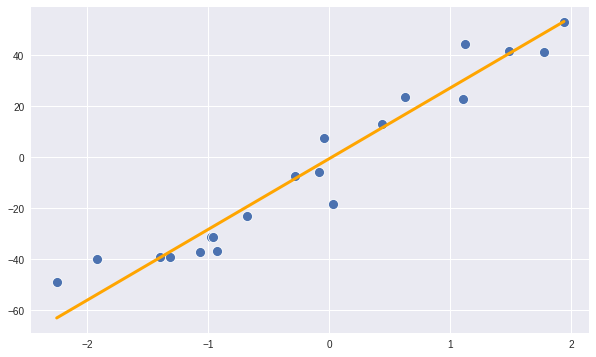

In [7]:
y_pred = regressor.pred_n_info(X_val, y_val)